>  # <font color='purple'>*For E-Commerce Company Customer Segmentation and Determining of Marketing Strategies*</font> 

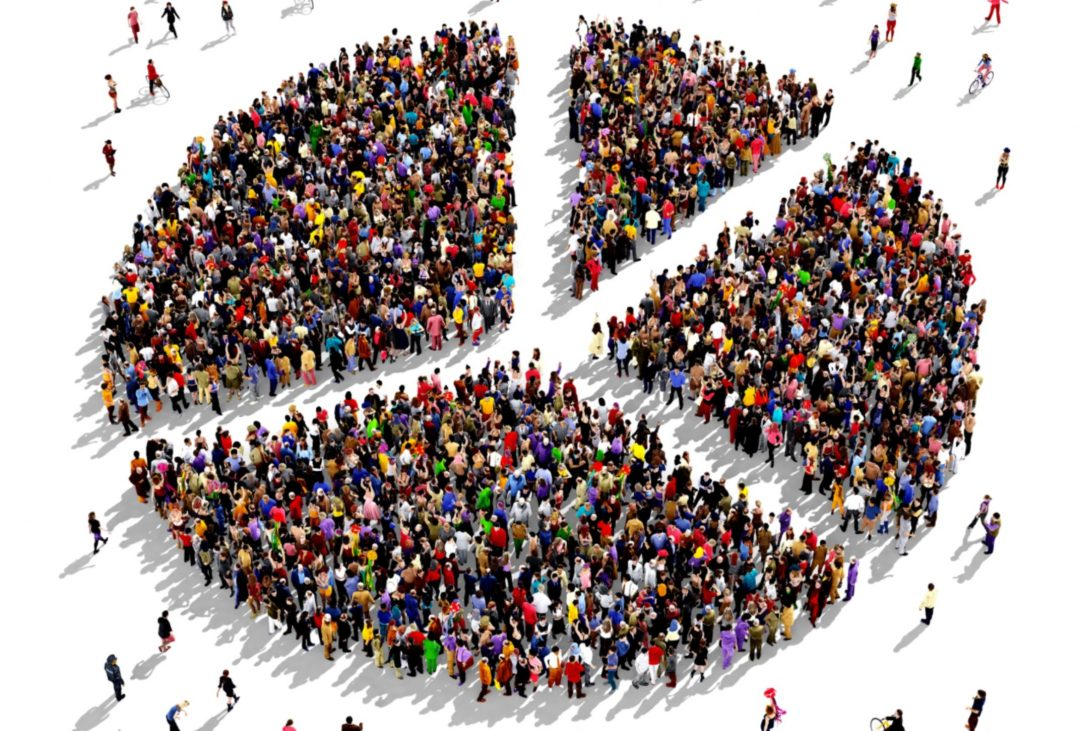

> ## <font color='darkred'> *Business Problem*</font> 


**An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.**

**For this, we will define the behavior of customers and create groups according to clustering in these behaviors.**

**In other words, we will put those who display common behaviors in the same groups and we will try to develop sales and marketing techniques specific to these groups.**


> ## <font color='darkblue'> *Data Set Story*</font> 


https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

**The data set called Online Retail II includes the sales of a UK based online store between 01/12/2009 - 09/12/2011.**

**This company sells souvenirs. It can think like promotional products.**

**Most of their customers are wholesalers.**


> ## <font color='darkgreen'> *Variables:*</font> 


- **InvoiceNo: Invoice number. Unique number for each transaction, namely the invoice. If this code starts with C, it indicates that the transaction has been canceled.**
- **StockCode: Product code. Unique number for each product.**
- **Description: Product name**
- **Quantity: Number of products. Shows how many products in the invoices have been sold.**
- **InvoiceDate: Invoice date and time.**
- **UnitPrice: Product price (sterling)**
- **CustomerID: Unique customer number**
- **Country: Country name. The country where the customer lives.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# To show all observations and variables:
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);
import matplotlib.pyplot as plt

# Determining how many decimals will display after commas:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt

In [ ]:
# Let's read our data set

df_2010_2011 = pd.read_excel("../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [ ]:
# We copy dataset to avoid damaging the data set and we will work on the copy

df = df_2010_2011.copy()

In [ ]:
# Let's check, is there any problem with the copy we will work on ?

df.head()


> #####  <font color='darkred'> ****Let's use a few basic functions to get information about variables.****</font> 

In [ ]:
# Number of observation
df.shape   

In [ ]:
# Last 5 observation
df.tail()

In [ ]:
# Let's use a few basic functions to get information about variables.
df.info()

In [ ]:
# Let's ask if there is any missing data anywhere in the data set. There is if it turns True.

df.isnull().values.any()

In [ ]:
#  It shows null values

df.isnull().sum()

In [ ]:
df.head()

In [ ]:
# Let's look at the variables in the data set
df.columns

In [ ]:
# What is the number of unique items? we can look this way
df["Description"].nunique()

# If we write this way, it will be easier to read the output
print("Description : ", df["Description"].nunique())
print("StockCode : ", df["StockCode"].nunique()) 
print("Invoice : ", df["Invoice"].nunique())

In [ ]:
df["Description"].value_counts().head()

In [ ]:
# Which is the most ordered product?
df.groupby("Description").agg({"Quantity":"sum"}).head() 

> ### <font color='blue'> ***RFM ANALYSIS***</font>

In [ ]:
clean_df = df.dropna()

In [ ]:
clean_df.head()

In [ ]:
clean_df.isnull().values.any()

In [ ]:
# Missing value addition function, but since we do not have missing values anyway, all will be shown as zero

clean_df.isnull().sum()

In [ ]:
# The values starting with C in the invoice variable represent the returned ones
# It will be useful to remove them because we will collect the values in the invoices as sales.
# ~ this sign means "not" and "the opposite".

clean_df = clean_df[~clean_df["Invoice"].str.contains("C", na = False)]

In [ ]:
# Let's see how many observation units are left in the data set after this process.

clean_df.shape

In [ ]:
# We will need the maximum amount of revenue for FRM analysis so we create this variable.

clean_df["TotalPrice"] = clean_df["Quantity"] + clean_df["Price"]

In [ ]:
# Let's look at the old and new state of our dataset
df.describe().T
# old version

In [ ]:
# new version
clean_df.describe().T

> ### <font color='blue'> ***Recency***</font>

In [ ]:
import datetime as dt

In [ ]:
clean_df.columns

In [ ]:
clean_df["InvoiceDate"].max()

In [ ]:
# I create the next day from the last day as the "last day" in order to avoid the problem of not being able to select last day's transactions.

last_time = dt.datetime(2011, 12, 10)

# Let's see if it created

last_time

In [ ]:
# Type of "Customer ID" is float, let's convert this to an integer

clean_df["Customer ID"]= clean_df["Customer ID"].astype(int)

clean_df.head()

In [ ]:
# Let's create a temporary DataFrame and calculate how many days it takes customers from the last purchase date to the last date.

temp_df = (last_time - clean_df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.head()

In [ ]:
# Let's change the name of the "InvoiceDate" variable to "Recency" because it shows us the value of "Recency" now.
temp_df.rename(columns = {"InvoiceDate":"Recency"}, inplace = True)
temp_df.head()

In [ ]:
# Recency values above are nice, but when dealing with them, day values are enough for us. Let's eliminate the Hour and Minute values.
# Let's write our own function, access each element of the Recency variable in temp_df and get the days of those.
# let me create a DataFrame named recency_df to keep these values
recency_df = temp_df["Recency"].apply(lambda x: x.days)

recency_df.head()

> ### <font color='blue'> ***Frequency***</font>

In [ ]:
# calculate how many bills a user has, that is how many times they shop
# Let's create a new df, group it according to the Customer ID, and do it according to the unique values of the "InvoiceDate" variable.
# by the way, for example, if "unique" = (0,1,2,3) then "nunique" = (4).
freq_df = clean_df.groupby("Customer ID").agg({"InvoiceDate":"nunique"})

freq_df.rename(columns={"InvoiceDate": "Frequency"}, inplace = True)

freq_df.head()



> ### <font color='blue'> ***Monetary***</font>

In [ ]:
# Let's do it even if we don't use it much
# Let's groupby according to the customers and save the total purchases of each customer (how many items they bought) in a new DataFrame and see.

monetary_df = clean_df.groupby("Customer ID").agg({"TotalPrice":"sum"})

monetary_df.rename(columns={"TotalPrice":"Monetary"}, inplace=True)

monetary_df.head()

In [ ]:
# Let's check if the 3 DataFrames we created are equal. because they are all customer-based so their numbers must be equal

print(recency_df.shape, freq_df.shape, monetary_df.shape)

In [ ]:
# Let's combine these 3 DataFrames in one DataFrame
# We say  pd.concat, so merge. Okay, what are you going to put together, give it to me as a list. okay
# So how do I merge? Combine by column. Then write axis = 1 so that the columns come together like this
rfm = pd.concat([recency_df, freq_df, monetary_df], axis=1)

rfm.head()

##### Currently we have our RFM metrics. Now our goal is to convert these RFM metrics to SCORES.
##### because when I look at any part of the data, I can't see if the value is big or small, so we will generate scores.

In [ ]:
# Let's create a new variable and call it "RecencyScore"

# here is a ranking within itself.
# We say split into 5, it says give the labels in descending order
# So if the Recency value is high, give me a value of 1.
# or give the value 5 if it's 0 or 1

rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])

rfm.head()

In [ ]:
# hey pandas can you get me the "qcut" function from pandas? Yes. So what does this function do?
# "qcut" function is used to divide according to quartiles. and the function says I have some expectations from you
# function says that my first argument must be the variable you want to "cut".
# Give the variable we want to "cut", the Recency variable in rfm.
# then the function says, how many would you divide this value? And ı say 5.
# You give me a label list and i'll label them according to this label list. ok, i am giving it as a list
# Well, i want it to be tagged with labels after it is over
# will give the first value in the label list to the first value it finds when sorted from small to large
# Our perception of size and size in "recency" is different from others
# The value of 1 in the "recency" variable means, "the customer purchased a day ago, did something good, a 5 points to you"
# High values in "frequency" and "monetary" variables are 5 points for us.
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm.head()

In [ ]:
# rfm scores converted to categorical values and added to df
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                    rfm['FrequencyScore'].astype(str) + 
                    rfm['MonetaryScore'].astype(str))

rfm.head()

In [ ]:
# Suppose we want to access the "Champions" group. What should we do ?
# We say choose from your "rfm df"
# rfm []
# I want to set condition. It says enter a variable for condition and set condition.
# rfm [rfm ["RFM_SCORE"]]
# ok what's your condition? I say 555. I know you are the "champion" class 555

rfm[rfm["RFM_SCORE"]==555].head()
# Here "champions" came 

In [ ]:
rfm.describe().T

In [ ]:
# What do we do if we want to go to "hibernating" group?

rfm[rfm["RFM_SCORE"]==111].head()  #  hibernating


In [ ]:
# RFM map was created using Regular Expressions.
# denotes the first bracket R, the second to F.
# capturing the mapping process is the 'regex'.
# We created a dictionary called seg_map, in the form of key-value.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
# Inside RFM "We created a segment and made this variable by combining 2 strings"

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

rfm.head()

In [ ]:
# I will apply the regex matches (key-value matches) we wrote above to the Segment here.
# I say replace. replace a string method.
# When asked what to change according to, we send the regex map (seg_map)
# We said rename the values inside the segment. What should I name according to

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

rfm.head()

In [ ]:
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])



##### we can read above as follows.
"About to Sleep"
    There are 353 customers in the segment.
    The Recency value of this segment is 52.37. In other words, people in this segment have been absent for about 50 days.
    These people bought on average 1.16 times
    And these people left an average of 378.40 income in total.

"Need Attention"
    We have 184 people in this group.
    These 184 persons average 51.27 days absent
    Purchased an average of 2.45 units
    They left us around 724.28
    
THIS QUESTION CAME IN MY MIND. WHAT IS THE OVERALL RATE OF THESE PEOPLE? HOW DO WE CALCULATE THIS?
    If we divide all of the "count" into "shape", then we get a proportional value.
    
    If we add the median, we can evaluate it with the mean and interpret more accurately. If the differences are small, it is good and realistic.
    
"Champions"
    Champions have been absent for an average of 5 days. they are very active
    There are 632 champions in total. I was wondering the ratio again. I NEED TO PUT RATIO HERE BUT IT WILL BE THE INDEX PROBLEM

In [ ]:
# total number of customers
rfm.shape[0]   

In [ ]:
rfm[rfm["Segment"] == "Need Attention"].head()

In [ ]:
# list customer numbers of new customers
rfm[rfm["Segment"] == "New Customers"].index

In [ ]:
# for New Customers ;
new_customers = pd.DataFrame()

new_customers["NewCustomerID"] = rfm[rfm["Segment"] == "New Customers"].index

new_customers.to_csv("new_customers.csv")  # df'i kaydet 

new_customers.to_csv('new_customers.csv', index=False)

new_customers.head()

In [ ]:
# For Loyal Customers 

loyal_customers = pd.DataFrame()

loyal_customers["LoyalCustomersID"] = rfm[rfm["Segment"] == "Loyal Customers"].index

loyal_customers.to_csv('loyal_customers.csv', index=False)

loyal_customers.head()



In [ ]:
# For At Risk

at_risk = pd.DataFrame()

at_risk["AtRiskID"] = rfm[rfm["Segment"] == "At Risk"].index

at_risk.to_csv('at_risk.csv', index=False)

at_risk.head()


> ### <font color='blue'> ***RFM Analysis Result Recommendations***</font>

***The table is located just below the comments to make it easier to understand the comments.***

> ### <font color='darkred'> ***Loyal Customers;***</font>

***The table is located just below the comments to make it easier to understand the comments.***

- There are 820 customers

- Average recency values ​​29.

- Shopping frequency 5.

- A group with high income.

- It can be made one of the priority groups in dissatisfaction with the products so that they are not lost.

- They are in the active and high income group. Therefore, on the basis of the popular products they are interested in, they may try to move closer to the upper group with significant discounts on expensive products.

- With the discounts on popular products, this group can keep it more active, that is, it can be effective in increasing the frequency value.


> ### <font color='darkred'> ***At Risk;***</font>

- There are 594 customers.

- It is a large group that does not earn high income.

-Therefore, time should be spent on them and their potential should be utilized.

- Product expectations, price expectations and, if any, complaints can be heard with a short survey in return for a discount or gift. According to the results of the answers, this group can be divided into groups within itself and applied with different marketing tactics (short-term plan) and the results can be compared in detail and the resulting tactic can be transformed into the marketing strategy (long-term plan) of this group.


> ### <font color='darkred'> ***New Customers;***</font>

- Understanding this small group will help us to create great value and income for our company.

- There are 42 customers.

- Their frequency value is 1 because they are new, so it is high but it doesn't so much sence.

- When compared to general, it looks like a small and almost ineffective group.

- What makes this group valuable is that it hosts all those customers who create value for us, and the customer candidates we were able to carry until the champions with our directions. It should not be forgotten that new customers are what shape the future of the company and ensure its continuity.

- Starting with what brought them to us, we must discover the factors that keep them with us.

- Advertising is among the largest expense items of a company. What brings them to us can be an important factor in determining our advertising strategies.

##### Table

In [ ]:
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])